# Statistics for Data Science with Python: Final Assignment

**Project Scenario:** 

Project Scenario: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

* Is there a significant difference in the median value of houses bounded by the Charles river or not?
* Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
* Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?
* What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?



### Import Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

# Styling options
import warnings
warnings.filterwarnings('ignore')

Autosaving every 60 seconds


In [49]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
df = pd.read_csv(boston_url)
df.drop('Unnamed: 0', axis = 1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Data Exploration

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [51]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### Data Viz - (uncomment for visuals)

In [52]:
#df.hist(bins=50, figsize=(20,10))
#plt.suptitle('FT Distributions', x=0.8, y=1.05, ha='center', fontsize='large')
#plt.tight_layout()
#plt.show()

In [53]:
#plt.figure(figsize=(22,22))
#plt.suptitle('Pairplots of features', x=0.8, y=1.05, ha='center', fontsize='large')
#sns.pairplot(df.sample(200))
#plt.show()

# See matplotlib.org for more info

### Task 4

#### Median value of owner occupied homes

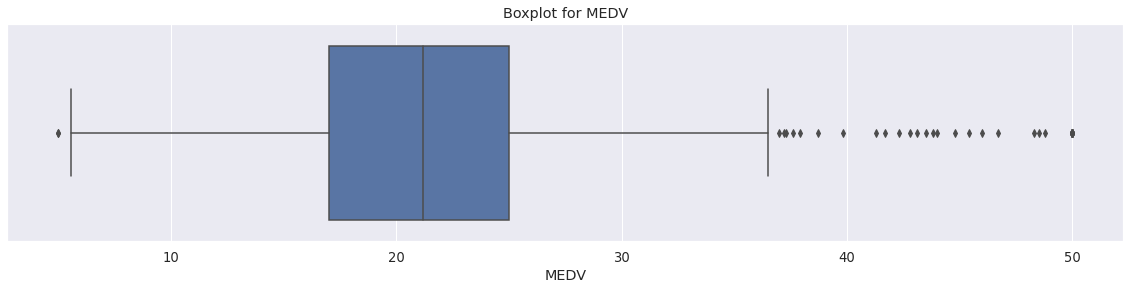

In [54]:
#For the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(20,4))
sns.boxplot(x=df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

> Outliers beyond the third quartile.
---

#### Histogram for Charles River

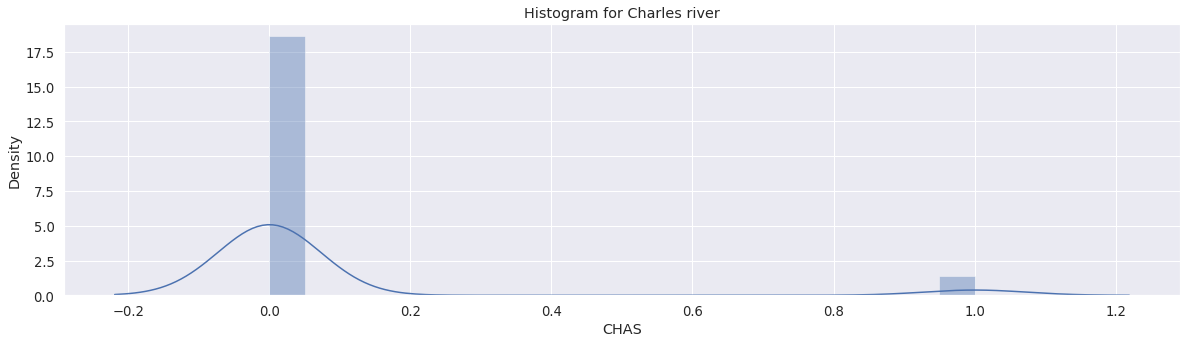

In [55]:
#Provide a histogram for the Charles river variable
plt.figure(figsize=(20,5))
sns.distplot(a=df.CHAS,bins=20, kde=True)
plt.title("Histogram for Charles river")
plt.show()

---

#### Boxplot for MEDV variable vs AGE variable

In [56]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

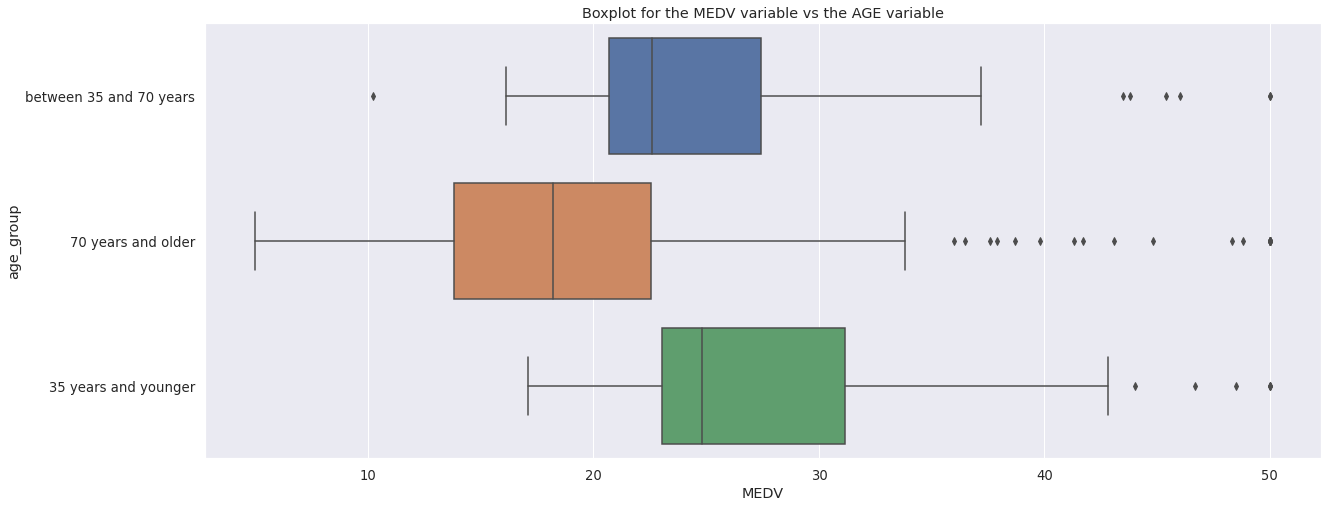

In [57]:
df.loc[(df['AGE'] <= 35), 'age_group'] = '35 years and younger'
df.loc[(df['AGE'] > 35)&(df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
df.loc[(df['AGE'] >=70), 'age_group'] = '70 years and older'
plt.figure(figsize=(20,8))
sns.boxplot(x=df.MEDV, y=df.age_group, data=df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

The age group 35 years and younger pays the highest median housprices

---

 #### Nitric oxide concentration and non retail business acres per town.

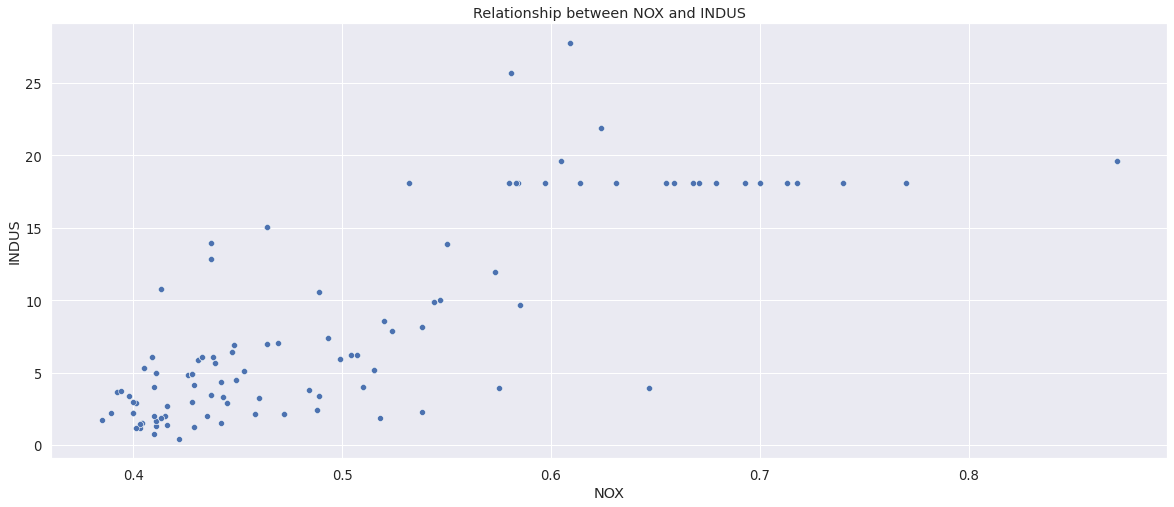

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [58]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business
#acres per town. What can you say about the relationship?
plt.figure(figsize=(20,8))
sns.scatterplot(x=df.NOX, y=df.INDUS, data=df)
plt.title("Relationship between NOX and INDUS")
plt.show()

df

* There appears to be a linear relationship between NOX and INDUS.

---
#### Pupil to Teacher Ratio

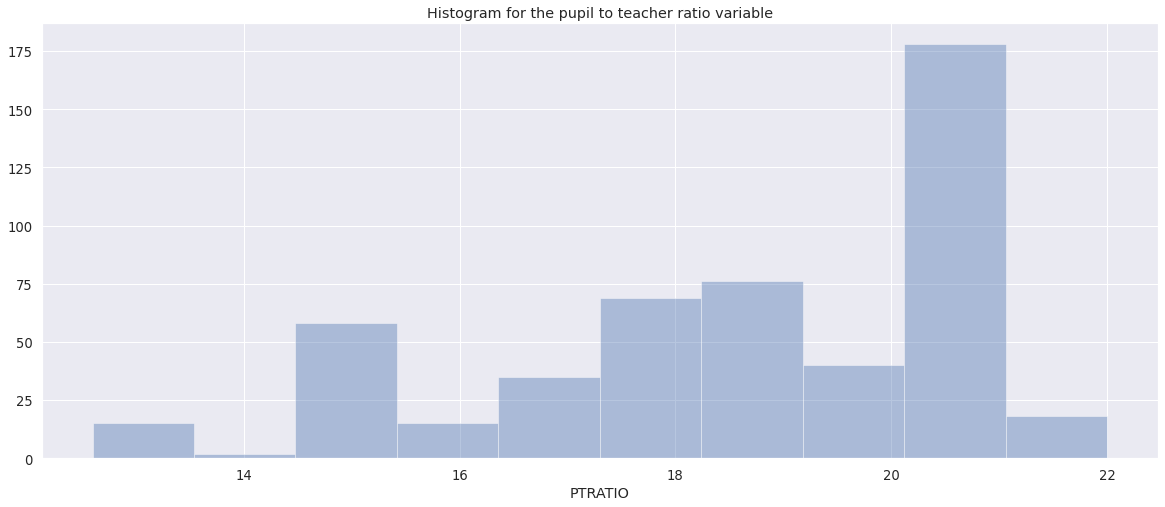

In [59]:
#Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(20,8))
sns.distplot(a=df.PTRATIO,bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

* There The pupil to teacher ratio is highest between 20 and 21
--- 

### TASK 5

#### Use the appropriate tests to answer the questions provided.

###### For each of the following questions;
* Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
* Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
* Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
* What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

##### Be sure to:
1. State your hypothesis.
2. Use α = 0.05
3. Perform the test Statistics.
4. State the conclusion from the test.

####  Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
**Hypothesis**
* Null Hypothesis($H_0$): Both average MEDV are the same / There isn't any significant difference in the median value of houses bounded by the Charles river.
* Alternative Hypothesis($H_1$): Both average MEDV are NOT the same / There is a significant difference in the median value of houses bounded by the Charles river.

**I will use t-test to prove or reject zero hypothesis. P-value must be greater than 0.05 to prove the zero hypothesis.** 

In [60]:
a = df[df["CHAS"] == 0]["MEDV"]
b = df[df["CHAS"] == 1]["MEDV"]
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

#### Outcome:
**P-value is more than alpha value of 0.05 (=7.390623170519905e-05), we failed to reject null hypothesis. - There is NO statistical significance.*

---

#### Median values of houses (MEDV)to proportion of owner occupied units built before to 1940?
**Hypothesis**
* Null hypothesis ($H_0$): The Three population means are equal
* Alternative hypothesis ($H_1$): One of the means is not equal

In [61]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median
#value of owner occupied homes? (Regression analysis)

low = df[df["age_group"] == '35 years and younger']["MEDV"]
mid = df[df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = df[df["age_group"] == '70 years and older']["MEDV"]


f_stats, p_value = scipy.stats.f_oneway(low,mid,high)
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


#### Outcome:
Since p-value more than alpha value of 0.05, we failed to reject null hypothesis. - there is NO statistical significance.

---

####  Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
**Hypothesis**
* Null hypothesis ($H_0$): NOX is not correlated with INDUS
* Alternative hypothesis ($H_1$): NOX is correlated with INDUS

In [62]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion 
#of non-retail business acres per town? (Pearson Correlation)
pearson,p_value = scipy.stats.pearsonr(df["NOX"],df["INDUS"])
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.7636514469209151, P-value=7.913361061238693e-98


**Outcome**
p-value= 7.913361061238693e-98 we can conclude that a relationship exists between Nitric Oxide and non-retail business acres per town.

#### Impact of weighted distance to the five Boston employment centres on the median value of owner occupied homes
**Hypothesis**
* Null hypothesis ($H_0$): Weighted distances to the five Boston employment centres are not related to median value
* Alternative hypothesis ($H_1$): Weighted distances to the five Boston employment centres are related to median value

In [63]:
y = df['MEDV']
x = df['DIS']


x = sm.add_constant(x)

results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           1.21e-08
Time:                        23:28:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
##Pearson Coeffiecent value
np.sqrt(0.062)  

0.24899799195977465

**Outcome**
The Pearson coefficient value suggests there is a weak correlation between weighted distances to five Boston employment centres and the median value of owner-occupied homes

### Glossary

| Variable name | Description                                                 |
| ------------- |:-----------------------: |
| CRIM   | per capita crime rate by town                                      |
| ZM     | proportion of residential land zoned for lots over 25,000 sq.ft.   |
| INDUS  |  proportion of non-retail business acres per town.                 |
| CHAS   | Charles River dummy variable (1 if tract bounds river; 0 otherwise)|
| NOX    | nitric oxides concentration (parts per 10 million)                 |
| RM     | average number of rooms per dwelling                               |
| AGE    | proportion of owner-occupied units built prior to 1940             |
| DIS    | weighted distances to five Boston employment centres               |
| RAD    | index of accessibility to radial highways                          |
| TAX    | full-value property-tax rate per 10,000 USD                        |
| PTRATIO| pupil-teacher ratio by town                                        |
| LSTAT  | Percentage lower status of the population                          |
| MEDV   | Median value of owner-occupied homes in $1000's                    |

---
### End of assignment
#### Thank you for your review.